# Trực Quan Hóa Dữ Liệu Sản Phẩm

**Đề tài:** Phân tích & Trực quan hóa Dữ liệu Bán hàng Điện tử

Notebook này bao gồm:

- Tạo dữ liệu mẫu
- Khám phá dữ liệu (EDA)
- Làm sạch dữ liệu
- Hiển thị dữ liệu sau khi làm sạch
- Phân tích & trực quan hóa
- Phân tích nâng cao (RFM, basket)
- Kết luận & khuyến nghị

Bước 1: Cài đặt và Import Thư viện

In [1]:
# Cài đặt thư viện nếu cần (chỉ cần chạy một lần)
# !pip install pandas numpy matplotlib seaborn

# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Thiết lập hiển thị cho DataFrame
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Đã nhập các thư viện cần thiết và thiết lập style.")

✅ Đã nhập các thư viện cần thiết và thiết lập style.


Bước 2 : Tạo Dữ liệu Mẫu (Nếu chưa có)

In [4]:
# Tạo dữ liệu mẫu
np.random.seed(42)
n_records = 1000

products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch', 
            'Camera', 'TV', 'Speaker', 'Mouse', 'Keyboard']

data = {
    'OrderID': range(1, n_records + 1),
    'Date': [datetime(2024, 1, 1) + timedelta(days=random.randint(0, 365)) 
             for _ in range(n_records)],
    'Product': np.random.choice(products, n_records),
    'Category': np.random.choice(['Electronics', 'Accessories'], n_records),
    'Quantity': np.random.randint(1, 5, n_records),
    'Price': np.random.randint(100, 2000, n_records),
    'CustomerAge': np.random.randint(18, 65, n_records),
    'CustomerGender': np.random.choice(['Male', 'Female'], n_records),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], n_records),
    'PaymentMethod': np.random.choice(['Credit Card', 'Cash', 'E-wallet'], n_records)
}

df = pd.DataFrame(data)
df['Revenue'] = df['Quantity'] * df['Price']
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Lưu dữ liệu (để minh họa)
df.to_csv('sales_data.csv', index=False)

print("✅ Dữ liệu đã được tạo và lưu vào sales_data.csv")
print("\n👀 10 DÒNG DỮ LIỆU MẪU ĐẦU TIÊN:")
print("="*50)
print(df.head(10))

✅ Dữ liệu đã được tạo và lưu vào sales_data.csv

👀 10 DÒNG DỮ LIỆU MẪU ĐẦU TIÊN:
   OrderID       Date     Product     Category  Quantity  Price  CustomerAge  \
0        1 2024-05-19          TV  Electronics         2   1131           50   
1        2 2024-10-28  Headphones  Electronics         2    944           53   
2        3 2024-05-17     Speaker  Accessories         3   1323           35   
3        4 2024-03-11  Smartwatch  Accessories         2   1628           54   
4        5 2024-06-16          TV  Electronics         2    186           36   
5        6 2024-03-25    Keyboard  Accessories         3    142           64   
6        7 2024-03-03      Tablet  Accessories         4   1508           45   
7        8 2024-04-23          TV  Accessories         1   1744           57   
8        9 2024-05-01     Speaker  Accessories         4   1558           37   
9       10 2024-11-16  Smartwatch  Accessories         3    507           50   

  CustomerGender Region PaymentMethod 

Bước 3 : Đọc Dữ liệu và Chuyển đổi Kiểu Dữ liệu

In [5]:
# Đọc dữ liệu từ file
try:
    df = pd.read_csv('sales_data.csv')
    # Chuyển đổi cột 'Date' sang datetime
    df['Date'] = pd.to_datetime(df['Date'])
    print("✅ Đã đọc dữ liệu thành công.")
except FileNotFoundError:
    print("❌ Lỗi: Không tìm thấy file 'sales_data.csv'. Vui lòng chạy lại Cell 2.")

✅ Đã đọc dữ liệu thành công.


Bước 4 : Khám phá Dữ liệu (EDA - Exploratory Data Analysis)
Thông tin Tổng quan và Thống kê Mô tả

In [6]:
print("📊 THÔNG TIN TỔNG QUAN")
print("="*50)
df.info()

print("\n📈 THỐNG KÊ MÔ TẢ CÁC CỘT SỐ")
print("="*50)
df.describe()

📊 THÔNG TIN TỔNG QUAN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         1000 non-null   int64         
 1   Date            1000 non-null   datetime64[ns]
 2   Product         1000 non-null   object        
 3   Category        1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Price           1000 non-null   int64         
 6   CustomerAge     1000 non-null   int64         
 7   CustomerGender  1000 non-null   object        
 8   Region          1000 non-null   object        
 9   PaymentMethod   1000 non-null   object        
 10  Revenue         1000 non-null   int64         
 11  Month           1000 non-null   int64         
 12  Quarter         1000 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 101.7+ KB

📈 THỐNG KÊ MÔ TẢ CÁC

,OrderID,Date,Quantity,Price,CustomerAge,Revenue,Month,Quarter
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2024-07-01 13:13:26.400000,2.471000,1060.510000,41.316000,2609.263000,6.501000,2.512000
min,1.000000,2024-01-01 00:00:00,1.000000,100.000000,18.000000,107.000000,1.000000,1.000000
25%,250.750000,2024-04-04 00:00:00,1.000000,586.500000,30.000000,1113.500000,4.000000,2.000000
50%,500.500000,2024-06-30 12:00:00,2.000000,1042.000000,41.000000,1991.000000,6.500000,2.500000
75%,750.250000,2024-10-01 00:00:00,3.250000,1554.250000,53.000000,3698.500000,10.000000,4.000000
max,1000.000000,2024-12-31 00:00:00,4.000000,1999.000000,64.000000,7984.000000,12.000000,4.000000
std,288.819436,NaN,1.125356,551.056054,13.564813,1898.679338,3.406112,1.111347


Bước 5 : Kiểm tra Giá trị Thiếu và Mẫu Dữ liệu

In [7]:
print("🔍 KIỂM TRA DỮ LIỆU THIẾU")
print("="*50)
print(df.isnull().sum())

print("\n👀 MẪU DỮ LIỆU (10 DÒNG ĐẦU)")
print("="*50)
df.head(10)

🔍 KIỂM TRA DỮ LIỆU THIẾU
OrderID           0
Date              0
Product           0
Category          0
Quantity          0
Price             0
CustomerAge       0
CustomerGender    0
Region            0
PaymentMethod     0
Revenue           0
Month             0
Quarter           0
dtype: int64

👀 MẪU DỮ LIỆU (10 DÒNG ĐẦU)


,OrderID,Date,Product,Category,Quantity,Price,CustomerAge,CustomerGender,Region,PaymentMethod,Revenue,Month,Quarter
0,1,2024-05-19,TV,Electronics,2,1131,50,Male,South,E-wallet,2262,5,2
1,2,2024-10-28,Headphones,Electronics,2,944,53,Female,South,Credit Card,1888,10,4
2,3,2024-05-17,Speaker,Accessories,3,1323,35,Female,East,E-wallet,3969,5,2
3,4,2024-03-11,Smartwatch,Accessories,2,1628,54,Male,West,E-wallet,3256,3,1
4,5,2024-06-16,TV,Electronics,2,186,36,Male,South,E-wallet,372,6,2
5,6,2024-03-25,Keyboard,Accessories,3,142,64,Female,South,Cash,426,3,1
6,7,2024-03-03,Tablet,Accessories,4,1508,45,Female,East,Cash,6032,3,1
7,8,2024-04-23,TV,Accessories,1,1744,57,Female,West,E-wallet,1744,4,2
8,9,2024-05-01,Speaker,Accessories,4,1558,37,Male,South,E-wallet,6232,5,2
9,10,2024-11-16,Smartwatch,Accessories,3,507,50,Male,South,Credit Card,1521,11,4


Bước 6 : Làm sạch Dữ liệu
Xử lý Giá trị Thiếu và Trùng lặp

In [12]:
initial_rows = len(df) # 1000 dòng

# 4.1 Xử lý giá trị thiếu
df_cleaned = df.dropna()
missing_removed = initial_rows - len(df_cleaned)

# 4.2 Loại bỏ duplicate
df_cleaned = df_cleaned.drop_duplicates()
duplicate_removed = len(df_cleaned) - (initial_rows - missing_removed) # Số dòng bị loại bỏ thêm

final_rows = len(df_cleaned)

print("✅ BÁO CÁO LÀM SẠCH CƠ BẢN")
print("="*40)
print(f"   - Dữ liệu ban đầu: {initial_rows} dòng")
print(f"   - Đã loại bỏ giá trị thiếu (NaN): {missing_removed} dòng")
print(f"   - Đã loại bỏ dòng trùng lặp: {duplicate_removed} dòng")
print(f"   - Dữ liệu sau làm sạch: {final_rows} dòng") # Kết quả sẽ là 1000 dòng

# In ra 10 dòng dữ liệu đã được xử lý (theo yêu cầu)
print("\n👀 10 DÒNG DỮ LIỆU ĐÃ LÀM SẠCH:")
print("="*40)
print(df_cleaned.head(10))

✅ BÁO CÁO LÀM SẠCH CƠ BẢN
   - Dữ liệu ban đầu: 1000 dòng
   - Đã loại bỏ giá trị thiếu (NaN): 0 dòng
   - Đã loại bỏ dòng trùng lặp: 0 dòng
   - Dữ liệu sau làm sạch: 1000 dòng

👀 10 DÒNG DỮ LIỆU ĐÃ LÀM SẠCH:
   OrderID       Date     Product     Category  Quantity  Price  CustomerAge  \
0        1 2024-05-19          TV  Electronics         2   1131           50   
1        2 2024-10-28  Headphones  Electronics         2    944           53   
2        3 2024-05-17     Speaker  Accessories         3   1323           35   
3        4 2024-03-11  Smartwatch  Accessories         2   1628           54   
4        5 2024-06-16          TV  Electronics         2    186           36   
5        6 2024-03-25    Keyboard  Accessories         3    142           64   
6        7 2024-03-03      Tablet  Accessories         4   1508           45   
7        8 2024-04-23          TV  Accessories         1   1744           57   
8        9 2024-05-01     Speaker  Accessories         4   1558       

Bước 7: Xử lý Giá trị Ngoại lai (Outliers)

In [10]:
# 4.3 Xử lý outliers (Giá trị ngoại lai) bằng phương pháp IQR cho cột 'Revenue'
Q1 = df_cleaned['Revenue'].quantile(0.25)
Q3 = df_cleaned['Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_final = df_cleaned[(df_cleaned['Revenue'] >= lower_bound) & (df_cleaned['Revenue'] <= upper_bound)].copy()

print(f"✅ Dữ liệu gốc: {len(df)} dòng")
print(f"✅ Dữ liệu sau xử lý Outliers: {len(df_final)} dòng")
print(f"✅ Đã loại bỏ: {len(df_cleaned) - len(df_final)} outliers")

✅ Dữ liệu gốc: 1000 dòng
✅ Dữ liệu sau xử lý Outliers: 983 dòng
✅ Đã loại bỏ: 17 outliers


Bước 8: Phân tích Dữ liệu
 

Phân tích TOP Sản phẩm và Doanh thu theo Vùng

In [13]:
# 5.1 Phân tích theo Sản phẩm
print("\n📦 TOP 5 SẢN PHẨM BÁN CHẠY NHẤT (THEO DOANH THU)")
print("="*50)
top_products = df_final.groupby('Product').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).sort_values('Revenue', ascending=False).head(5)
print(top_products)

# 5.2 Phân tích theo Vùng
print("\n🌍 DOANH THU THEO VÙNG")
print("="*50)
region_analysis = df_final.groupby('Region').agg({
    'Revenue': ['sum', 'mean', 'count']
}).round(2)
print(region_analysis)


📦 TOP 5 SẢN PHẨM BÁN CHẠY NHẤT (THEO DOANH THU)
            Quantity  Revenue
Product                      
Laptop           273   290281
Smartwatch       256   268931
Tablet           250   263016
Headphones       233   255269
Keyboard         268   247079

🌍 DOANH THU THEO VÙNG
       Revenue               
           sum     mean count
Region                       
East    627358  2509.43   250
North   583623  2537.49   230
South   600148  2479.95   242
West    665750  2550.77   261


 Phân tích Xu hướng theo Thời gian và Độ tuổi Khách hàng

In [14]:
# 5.3 Phân tích theo Thời gian
print("\n📅 DOANH THU THEO THÁNG")
print("="*50)
monthly_revenue = df_final.groupby('Month')['Revenue'].sum().sort_index()
print(monthly_revenue)

# 5.4 Phân tích theo Độ tuổi khách hàng
print("\n👥 PHÂN TÍCH THEO ĐỘ TUỔI")
print("="*50)
# Tạo cột nhóm tuổi
df_final['AgeGroup'] = pd.cut(df_final['CustomerAge'], 
                              bins=[0, 25, 35, 45, 55, 100],
                              labels=['18-25', '26-35', '36-45', '46-55', '55+'], 
                              right=True) # right=True bao gồm giá trị biên trên
age_analysis = df_final.groupby('AgeGroup', observed=False)['Revenue'].sum()
print(age_analysis)


📅 DOANH THU THEO THÁNG
Month
1     203687
2     232314
3     186423
4     161745
5     213631
6     205047
7     243587
8     212975
9     180757
10    223656
11    226400
12    186657
Name: Revenue, dtype: int64

👥 PHÂN TÍCH THEO ĐỘ TUỔI
AgeGroup
18-25    403765
26-35    558660
36-45    499508
46-55    550189
55+      464757
Name: Revenue, dtype: int64


 Bước 9 : Trực quan hóa Dữ liệu


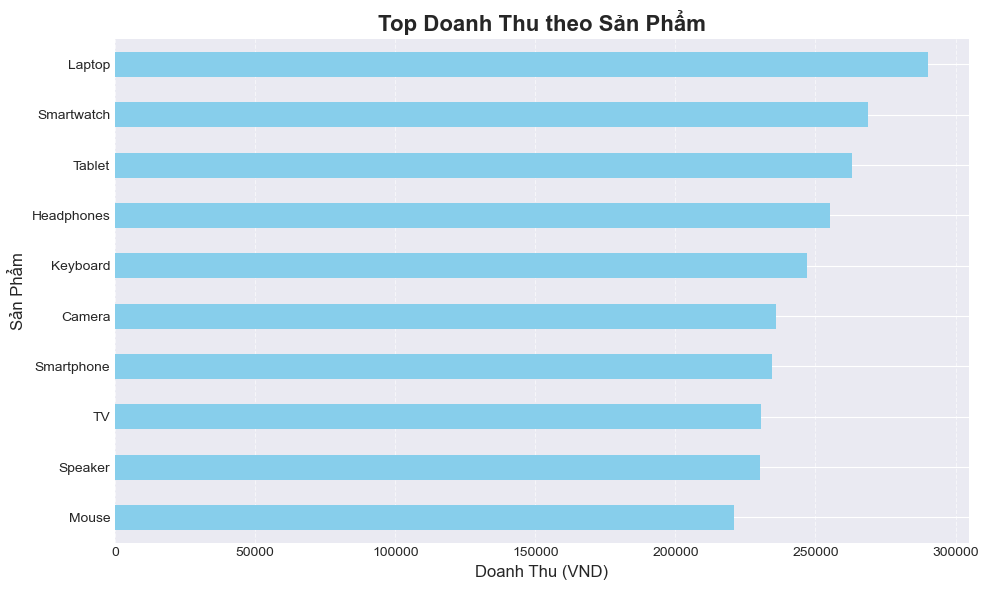

In [22]:
# Lấy dữ liệu đã tính toán (Giả định df_final đã được tạo ở các cell trước)
product_revenue = df_final.groupby('Product')['Revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))

# Biểu đồ Doanh thu theo Sản phẩm
product_revenue.plot(kind='barh', color='skyblue')
plt.title('Top Doanh Thu theo Sản Phẩm', fontsize=16, fontweight='bold')
plt.xlabel('Doanh Thu (VND)', fontsize=12)
plt.ylabel('Sản Phẩm', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) # Chỉ kẻ lưới ngang để dễ so sánh giá trị

plt.tight_layout()
plt.show()

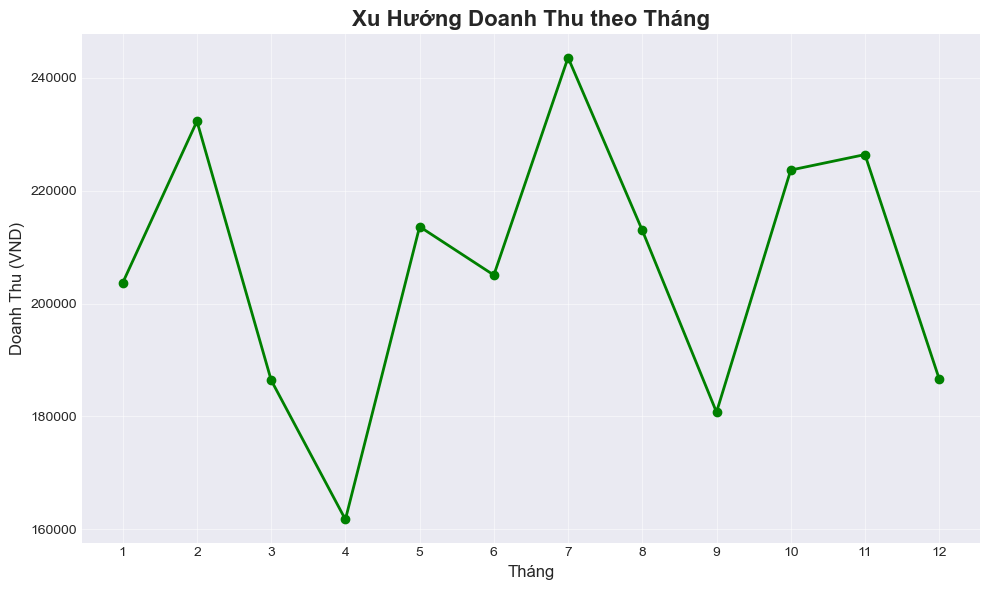

In [23]:
# Lấy dữ liệu đã tính toán (Giả định df_final đã được tạo ở các cell trước)
monthly_revenue = df_final.groupby('Month')['Revenue'].sum().sort_index()

plt.figure(figsize=(10, 6))

# Biểu đồ Xu hướng theo Tháng
monthly_revenue.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Xu Hướng Doanh Thu theo Tháng', fontsize=16, fontweight='bold')
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh Thu (VND)', fontsize=12)
plt.xticks(monthly_revenue.index) # Đảm bảo trục X hiển thị đủ các tháng
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

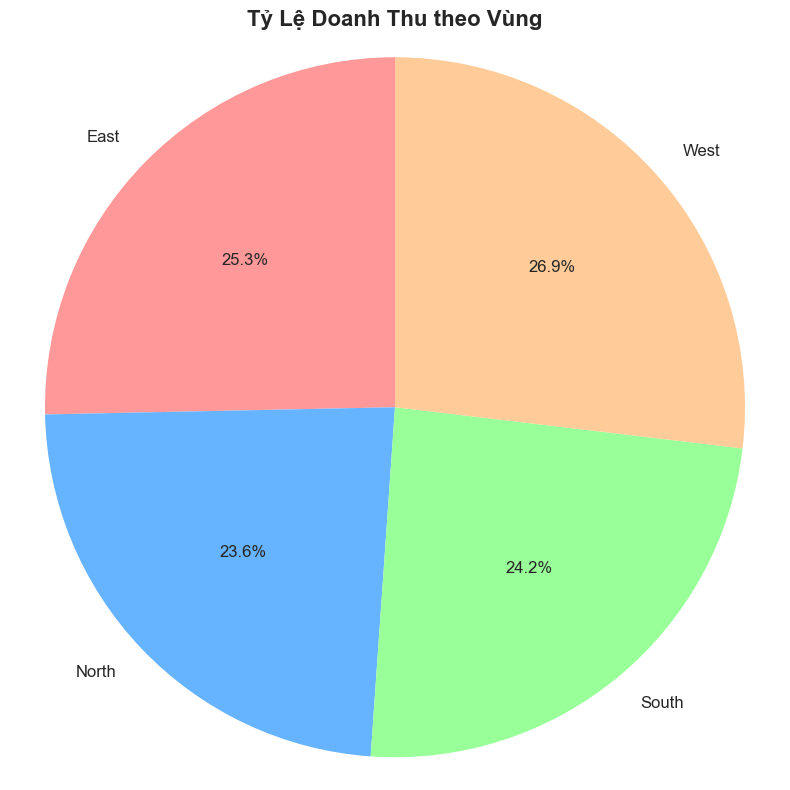

In [24]:
# Lấy dữ liệu đã tính toán (Giả định df_final đã được tạo)
region_revenue = df_final.groupby('Region')['Revenue'].sum()

plt.figure(figsize=(8, 8)) # Kích thước hình tròn

# Biểu đồ tròn - Tỷ lệ Doanh thu theo Vùng
plt.pie(region_revenue.values, 
        labels=region_revenue.index, 
        autopct='%1.1f%%',
        startangle=90, 
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], 
        textprops={'fontsize': 12})

plt.title('Tỷ Lệ Doanh Thu theo Vùng', fontsize=16, fontweight='bold')
plt.axis('equal') # Đảm bảo biểu đồ tròn hoàn hảo

plt.tight_layout()
plt.show()

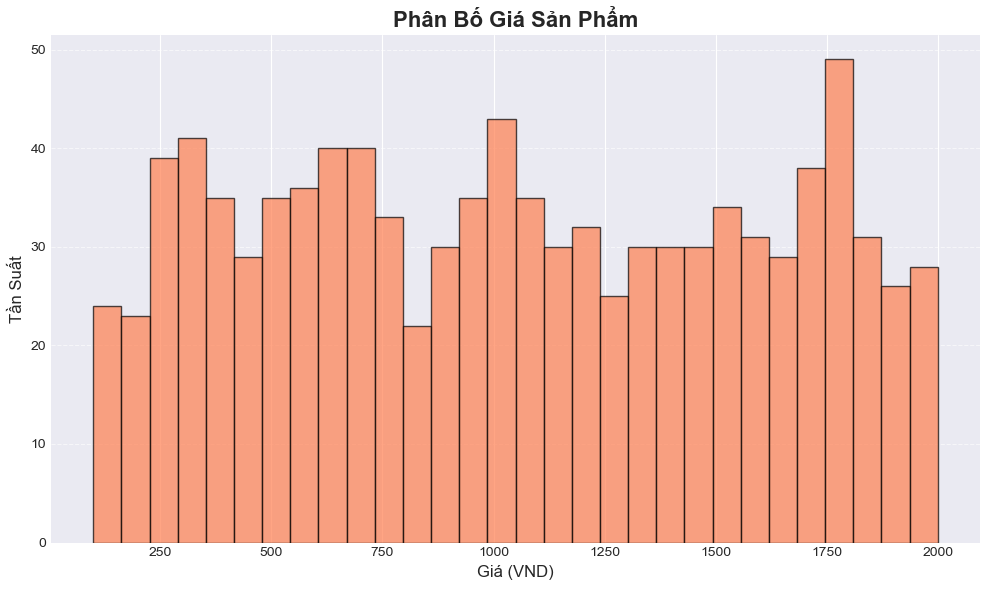

In [25]:
# Lấy dữ liệu đã tính toán (Giả định df_final đã được tạo)

plt.figure(figsize=(10, 6))

# Histogram - Phân bố Giá
df_final['Price'].hist(bins=30, color='coral', edgecolor='black', alpha=0.7)

plt.title('Phân Bố Giá Sản Phẩm', fontsize=16, fontweight='bold')
plt.xlabel('Giá (VND)', fontsize=12)
plt.ylabel('Tần Suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

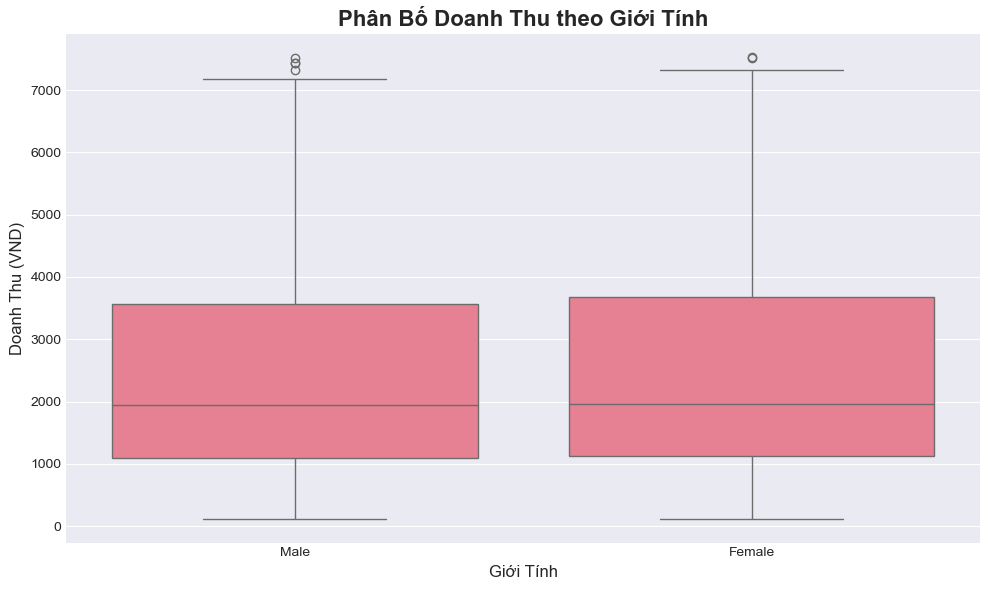

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu đã tính toán (Giả định df_final đã được tạo)

plt.figure(figsize=(10, 6))

# Box plot - Phân bố Doanh thu theo Giới tính
sns.boxplot(x='CustomerGender', y='Revenue', data=df_final)
plt.title('Phân Bố Doanh Thu theo Giới Tính', fontsize=16, fontweight='bold')
plt.xlabel('Giới Tính', fontsize=12)
plt.ylabel('Doanh Thu (VND)', fontsize=12)

plt.tight_layout()
plt.show()

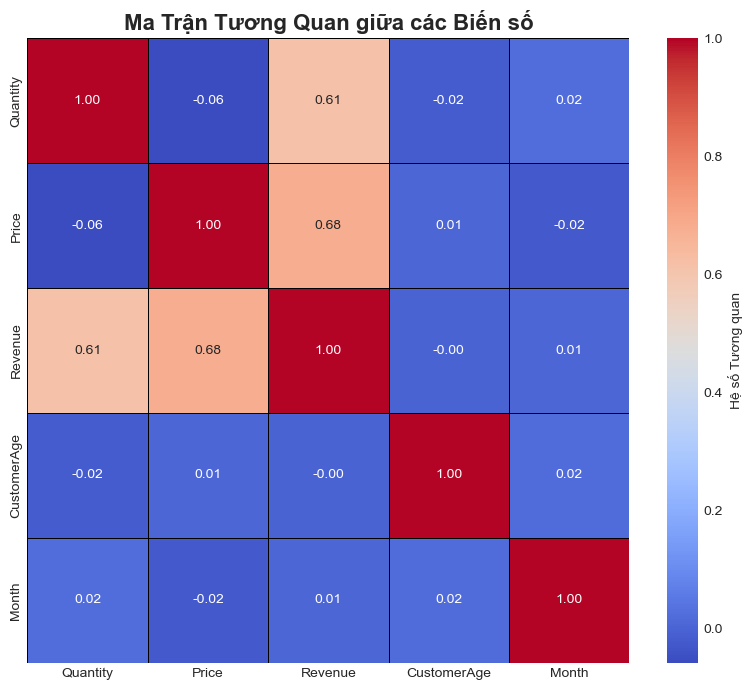

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu đã tính toán (Giả định df_final đã được tạo)
correlation_cols = ['Quantity', 'Price', 'Revenue', 'CustomerAge', 'Month']
corr_matrix = df_final[correlation_cols].corr()

plt.figure(figsize=(8, 7))

# Heatmap - Ma Trận Tương quan
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=.5, linecolor='black', 
            cbar_kws={'label': 'Hệ số Tương quan'})
            
plt.title('Ma Trận Tương Quan giữa các Biến số', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

 Bước 10 : Phân tích Nâng cao (RFM)
 Phân tích RFM (Recency, Frequency, Monetary)

In [18]:
# Chuẩn bị dữ liệu RFM
current_date = df_final['Date'].max() + timedelta(days=1) # Ngày hiện tại sau ngày giao dịch cuối cùng

rfm = df_final.groupby('OrderID').agg(
    Customer_ID=('OrderID', 'first'), # Tạo cột giả để group by
    Date=('Date', 'max'),
    Frequency=('OrderID', 'count'),
    Monetary=('Revenue', 'sum')
)
rfm = rfm.reset_index(drop=True)

# Tính Recency (Số ngày kể từ lần mua cuối)
rfm['Recency'] = (current_date - rfm['Date']).dt.days

# Tính điểm R, F, M (Qcut phân đoạn dựa trên phân phối)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]) # R: Recency càng thấp (mua gần đây) thì điểm càng cao
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]) # F: Frequency càng cao thì điểm càng cao
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]) # M: Monetary càng cao thì điểm càng cao

# Tạo điểm RFM tổng hợp
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print("\n💎 PHÂN KHÚC KHÁCH HÀNG (RFM Score)")
print("="*50)
print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].head(10))

# Ví dụ phân khúc: Những người mua hàng tốt nhất (Best Customers)
best_customers = rfm[rfm['RFM_Score'].str.startswith('44') | rfm['RFM_Score'].str.startswith('43')]
print(f"\nSố lượng khách hàng tốt nhất (44x hoặc 43x): {len(best_customers)}")


💎 PHÂN KHÚC KHÁCH HÀNG (RFM Score)
   Recency  Frequency  Monetary RFM_Score
0      227          1      2262       213
1       65          1      1888       412
2      229          1      3969       214
3      296          1      3256       113
4      199          1       372       211
5      282          1       426       111
6      304          1      6032       114
7      253          1      1744       212
8      245          1      6232       214
9       46          1      1521       412

Số lượng khách hàng tốt nhất (44x hoặc 43x): 124


Kết luận và Khuyến nghị,
Tổng hợp Key Metrics và Đề xuất Kinh doanh

In [19]:
print("\n" + "="*70)
print("📝 KẾT LUẬN VÀ KHUYẾN NGHỊ KINH DOANH")
print("="*70)

# Tính toán các chỉ số chính
total_revenue = df_final['Revenue'].sum()
avg_order_value = df_final['Revenue'].mean()
total_orders = len(df_final)
best_product = df_final.groupby('Product')['Revenue'].sum().idxmax()
best_month = df_final.groupby('Month')['Revenue'].sum().idxmax()

print(f"""
1. TỔNG QUAN HIỆU SUẤT BÁN HÀNG:
   - Tổng Doanh Thu (Sau Outlier): {total_revenue:,.0f} VND
   - Tổng Số Đơn Hàng (Sau Outlier): {total_orders:,}
   - Giá trị Đơn Hàng Trung Bình (AOV): {avg_order_value:,.0f} VND

2. PHÂN TÍCH SẢN PHẨM & THỜI GIAN:
   - Sản phẩm **Bán chạy nhất (Doanh thu)**: **{best_product}**
   - Tháng có Doanh thu **Cao nhất**: **Tháng {best_month}**
   
3. PHÂN TÍCH KHÁCH HÀNG:
   - Phân khúc Độ tuổi mua hàng chính: **{df_final['AgeGroup'].mode()[0]}**
   - Phân khúc RFM tiềm năng (ví dụ): {len(best_customers)} khách hàng có điểm RFM cao.

4. KHUYẾN NGHỊ CHIẾN LƯỢC:
   ✓ **Tập trung Sản phẩm:** Tăng cường Marketing và đảm bảo tồn kho cho sản phẩm **{best_product}** và các sản phẩm Top 5.
   ✓ **Tối ưu hóa Thời gian:** Lên kế hoạch khuyến mãi lớn và chiến dịch quảng cáo đặc biệt vào **Tháng {best_month}** để tận dụng xu hướng.
   ✓ **Chính sách Khách hàng:** Xây dựng chương trình **Loyalty/VIP** cho nhóm khách hàng **RFM cao** (Recency 4, Frequency 4, Monetary 4) và nhóm tuổi **{df_final['AgeGroup'].mode()[0]}**.
   ✓ **Cải thiện Vùng:** Nghiên cứu và đầu tư vào các vùng có doanh thu thấp (dựa trên Cell 8) để mở rộng thị phần.
""")


📝 KẾT LUẬN VÀ KHUYẾN NGHỊ KINH DOANH

1. TỔNG QUAN HIỆU SUẤT BÁN HÀNG:
   - Tổng Doanh Thu (Sau Outlier): 2,476,879 VND
   - Tổng Số Đơn Hàng (Sau Outlier): 983
   - Giá trị Đơn Hàng Trung Bình (AOV): 2,520 VND

2. PHÂN TÍCH SẢN PHẨM & THỜI GIAN:
   - Sản phẩm **Bán chạy nhất (Doanh thu)**: **Laptop**
   - Tháng có Doanh thu **Cao nhất**: **Tháng 7**
   
3. PHÂN TÍCH KHÁCH HÀNG:
   - Phân khúc Độ tuổi mua hàng chính: **46-55**
   - Phân khúc RFM tiềm năng (ví dụ): 124 khách hàng có điểm RFM cao.

4. KHUYẾN NGHỊ CHIẾN LƯỢC:
   ✓ **Tập trung Sản phẩm:** Tăng cường Marketing và đảm bảo tồn kho cho sản phẩm **Laptop** và các sản phẩm Top 5.
   ✓ **Tối ưu hóa Thời gian:** Lên kế hoạch khuyến mãi lớn và chiến dịch quảng cáo đặc biệt vào **Tháng 7** để tận dụng xu hướng.
   ✓ **Chính sách Khách hàng:** Xây dựng chương trình **Loyalty/VIP** cho nhóm khách hàng **RFM cao** (Recency 4, Frequency 4, Monetary 4) và nhóm tuổi **46-55**.
   ✓ **Cải thiện Vùng:** Nghiên cứu và đầu tư vào các vùng có